In [2]:
import pandas as pd
import numpy as np

# 数据导入与预处理

In [3]:
import pandas as pd

# Load the file to inspect its content
file_path = r'D:\xjtufiles\3ee\DGA_data_pre.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,h2,ch4,c2h6,c2h4,c2h2,act
0,294.00,27.40,5.6,52.60,338.00,1
1,200.83,59.45,41.0,40.48,150.84,1
2,71.60,20.20,2.7,34.60,44.20,1
3,29.30,24.90,7.3,11.40,7.50,1
4,1170.00,255.00,18.0,312.00,325.00,1


In [3]:
df

,h2,ch4,c2h6,c2h4,c2h2,act
0,294.00,27.40,5.600,52.60,338.000,1
1,200.83,59.45,41.000,40.48,150.840,1
2,71.60,20.20,2.700,34.60,44.200,1
3,29.30,24.90,7.300,11.40,7.500,1
4,1170.00,255.00,18.000,312.00,325.000,1
...,...,...,...,...,...,...
1430,980.00,73.00,58.000,12.00,0.000,6
1431,44.63,35.36,7.590,1.68,0.000,6
1432,743.00,74.00,39.000,6.00,0.000,6
1433,106.00,4.00,2.000,1.00,0.001,6


In [4]:
# df = pd.read_csv(r'D:\xjtufiles\3ee\DGA_data_pre.csv', index_col = 0)
df = df.iloc[:-1,:]
# df

df['h2'] = pd.to_numeric(df['h2'],errors='coerce')
df['ch4'] = pd.to_numeric(df['ch4'],errors='coerce')
df['c2h6'] = pd.to_numeric(df['c2h6'],errors='coerce')
df['c2h4'] = pd.to_numeric(df['c2h4'],errors='coerce')
df['c2h2'] = pd.to_numeric(df['c2h2'],errors='coerce')
df['act'] = pd.to_numeric(df['act'],errors='coerce')

#df.dtypes

In [5]:
df = df.reset_index(drop=True) #reset index

In [6]:
print(df['act'].nunique(dropna=True)) # 显示类别数量

6


In [7]:
# 统计 'act' 列中每个唯一值的计数
act_counts = df['act'].value_counts()

# 打印结果
print(act_counts)

act
2    465
1    252
4    206
5    191
3    187
6    133
Name: count, dtype: int64


In [8]:
act_percentages = df['act'].value_counts(normalize=True) * 100
print(act_percentages)

act
2    32.426778
1    17.573222
4    14.365411
5    13.319386
3    13.040446
6     9.274756
Name: proportion, dtype: float64


# 原始数据可视化

C:\Users\11094\AppData\Local\Temp\ipykernel_9992\3121626782.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'), #设置图例边框与柱子一致
C:\Users\11094\AppData\Local\Temp\ipykernel_9992\3121626782.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本') #设置图例边框与柱子一致


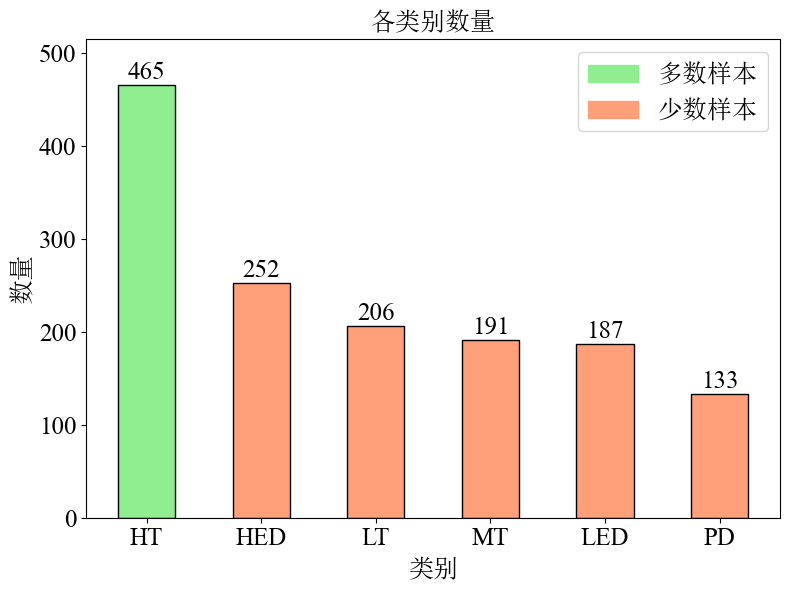

In [41]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

# 假设 df 是你的 DataFrame

act_counts = df['act'].value_counts()  # 计算每个类别的数量

font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=18)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=18)  # 设置字体路径和大小

# 创建类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 替换索引
act_counts.index = act_counts.index.map(category_mapping)

# 设置柱子颜色列表
colors = ['lightgreen', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon'] # 设定每个柱子的颜色

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
bars = plt.bar(act_counts.index, act_counts.values, color=colors, edgecolor='black', linewidth=1, width=0.5)  # 绘制柱状图，设置颜色、边框和宽度

plt.title('各类别数量', fontproperties=font_cn)  # 设置标题
plt.xlabel('类别', fontproperties=font_cn)  # 设置 x 轴标签
plt.ylabel('数量', fontproperties=font_cn)  # 设置 y 轴标签
plt.xticks(rotation=0, ha='center', fontproperties=font_en)  # 旋转 x 轴刻度标签，使其居中
plt.yticks(fontproperties=font_en)  # 设置 y 轴字体

# 在柱子上方显示样本数量
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontproperties=font_en)

# 添加样例图示
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'), #设置图例边框与柱子一致
    plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本') #设置图例边框与柱子一致
]
plt.legend(handles=legend_elements, loc='upper right', prop=font_cn)  # 添加图例，设置位置和字体

plt.ylim(0, max(act_counts.values) + 50) # 设置纵轴范围，+5是为了让最高柱子上方有空间

plt.tight_layout()  # 自动调整子图参数，使图形更紧凑
plt.show()  # 显示图形

C:\Users\11094\AppData\Local\Temp\ipykernel_9992\2313638102.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'),
C:\Users\11094\AppData\Local\Temp\ipykernel_9992\2313638102.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本')


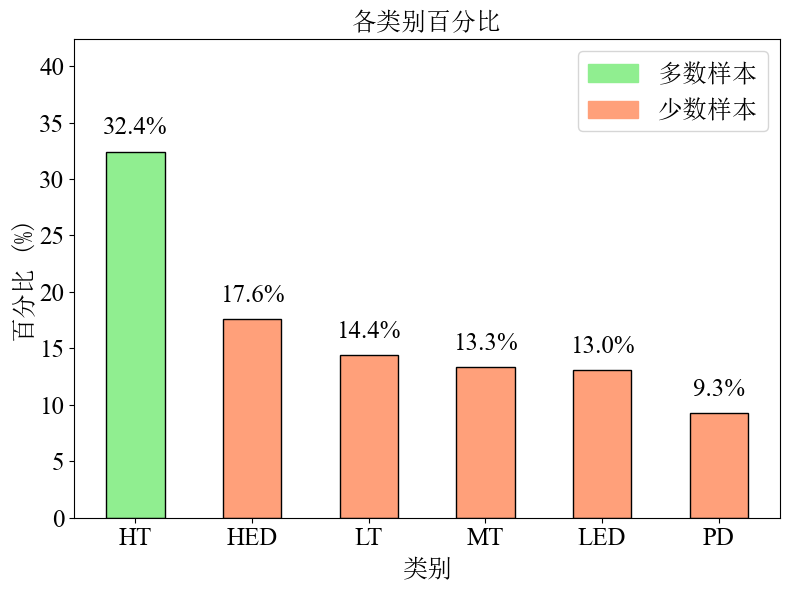

In [42]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

# 假设 df 是你的 DataFrame

act_percentages = df['act'].value_counts(normalize=True) * 100  # 计算每个类别的百分比

font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=18)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=18)  # 设置字体路径和大小

# 创建类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 替换索引
act_percentages.index = act_percentages.index.map(category_mapping)

# 设置柱子颜色列表
colors = ['lightgreen', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon']

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
bars = plt.bar(act_percentages.index, act_percentages.values, color=colors, edgecolor='black', linewidth=1, width=0.5)  # 绘制柱状图，设置颜色、边框和宽度

plt.title('各类别百分比', fontproperties=font_cn)  # 设置标题
plt.xlabel('类别', fontproperties=font_cn)  # 设置 x 轴标签
plt.ylabel('百分比 (%)', fontproperties=font_cn)  # 设置 y 轴标签
plt.xticks(rotation=0, ha='center', fontproperties=font_en)  # 旋转 x 轴刻度标签，使其居中
plt.yticks(fontproperties=font_en)  # 设置 y 轴字体

# 在柱子上方显示百分比
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontproperties=font_en)  # 显示百分比，保留一位小数

# 添加样例图示
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'),
    plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本')
]
plt.legend(handles=legend_elements, loc='upper right', prop=font_cn)  # 添加图例，设置位置和字体

plt.ylim(0, max(act_percentages.values) + 10)  # 设置纵轴范围，+10是为了让最高柱子上方有空间

plt.tight_layout()  # 自动调整子图参数，使图形更紧凑
plt.show()  # 显示图形

In [9]:
X = df.iloc[:, :5]
y = df.iloc[:, -1]


# 构建新的特征列

In [10]:
import pandas as pd

def create_interaction_features_with_names(X):
    """
    使用列名创建列之间的差和比值。

    参数：
    X (pd.DataFrame): 包含特征的 DataFrame。

    返回：
    pd.DataFrame: 包含原始特征以及差和比值的新 DataFrame。
    """

    col_names = X.columns  # 获取列名列表
    num_cols = len(col_names)  # 获取列数

    # 计算差值
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            col_name_i = col_names[i]
            col_name_j = col_names[j]
            X[f'diff_{col_name_i}_{col_name_j}'] = X.iloc[:, i] - X.iloc[:, j]

    # 计算比值 (注意处理除以零的情况)
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                col_name_i = col_names[i]
                col_name_j = col_names[j]
                X[f'ratio_{col_name_i}_{col_name_j}'] = X.iloc[:, i] / (X.iloc[:, j] + 1e-9)  # 添加一个小的常数以避免除以零

    return X

# 假设 X 是你的 DataFrame
# X = ...  # 你的 DataFrame

X_new = create_interaction_features_with_names(X.copy()) #使用copy()，避免原始数据被修改

print(X_new)

           h2     ch4   c2h6    c2h4     c2h2  diff_h2_ch4  diff_h2_c2h6  \
0      294.00   27.40   5.60   52.60  338.000       266.60        288.40   
1      200.83   59.45  41.00   40.48  150.840       141.38        159.83   
2       71.60   20.20   2.70   34.60   44.200        51.40         68.90   
3       29.30   24.90   7.30   11.40    7.500         4.40         22.00   
4     1170.00  255.00  18.00  312.00  325.000       915.00       1152.00   
...       ...     ...    ...     ...      ...          ...           ...   
1429   197.00   12.00   6.60   15.00    0.001       185.00        190.40   
1430   980.00   73.00  58.00   12.00    0.000       907.00        922.00   
1431    44.63   35.36   7.59    1.68    0.000         9.27         37.04   
1432   743.00   74.00  39.00    6.00    0.000       669.00        704.00   
1433   106.00    4.00   2.00    1.00    0.001       102.00        104.00   

      diff_h2_c2h4  diff_h2_c2h2  diff_ch4_c2h6  ...  ratio_c2h6_c2h4  \
0           24

# KNeighborsClassifier

## 未添加新特征

In [11]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

In [17]:
# 使用 KNN 进行分类
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
# 评估 KNN 模型
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[21  4  2  0  1  0]
 [ 2 40  0  0  1  0]
 [ 3  1 13  1  0  1]
 [ 1  1  1 16  1  1]
 [ 0  4  0  2 16  0]
 [ 1  0  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        28
           2       0.80      0.93      0.86        43
           3       0.81      0.68      0.74        19
           4       0.84      0.76      0.80        21
           5       0.84      0.73      0.78        22
           6       0.83      0.91      0.87        11

    accuracy                           0.81       144
   macro avg       0.81      0.79      0.80       144
weighted avg       0.81      0.81      0.80       144

Accuracy: 0.8055555555555556


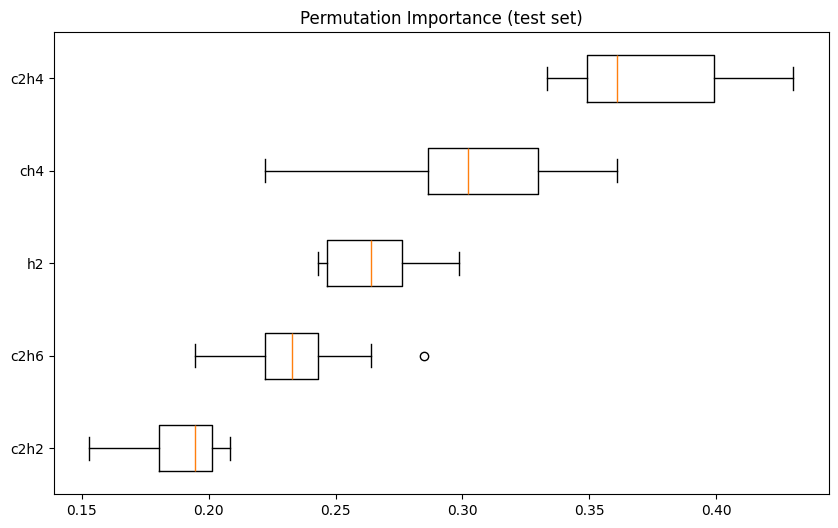

c2h2: 0.1896
c2h6: 0.2333
h2: 0.2660
ch4: 0.3028
c2h4: 0.3715


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 假设 X_train, y_train, X_test, y_test 已经定义

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

result = permutation_importance(classifier, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.4f}")

## 添加新特征

In [13]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size = 0.10, random_state=42)

In [14]:
# 使用 KNN 进行分类
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_new_train, y_new_train)
y_new_pred = classifier.predict(X_new_test)

c:\Users\11094\.conda\envs\pytorch\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\11094\.conda\envs\pytorch\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\11094\.conda\envs\pytorch\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\11094\.conda\envs\pytorch\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\11094\.conda\envs\pytorch\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [15]:
# 评估 KNN 模型
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_new_test, y_new_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_new_test, y_new_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_new_test,y_new_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[20  3  4  0  1  0]
 [ 2 36  0  2  3  0]
 [ 3  2 13  1  0  0]
 [ 0  1  1 15  2  2]
 [ 0  7  1  1 13  0]
 [ 0  0  2  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.71      0.75        28
           2       0.73      0.84      0.78        43
           3       0.62      0.68      0.65        19
           4       0.79      0.71      0.75        21
           5       0.68      0.59      0.63        22
           6       0.82      0.82      0.82        11

    accuracy                           0.74       144
   macro avg       0.74      0.73      0.73       144
weighted avg       0.74      0.74      0.73       144

Accuracy: 0.7361111111111112


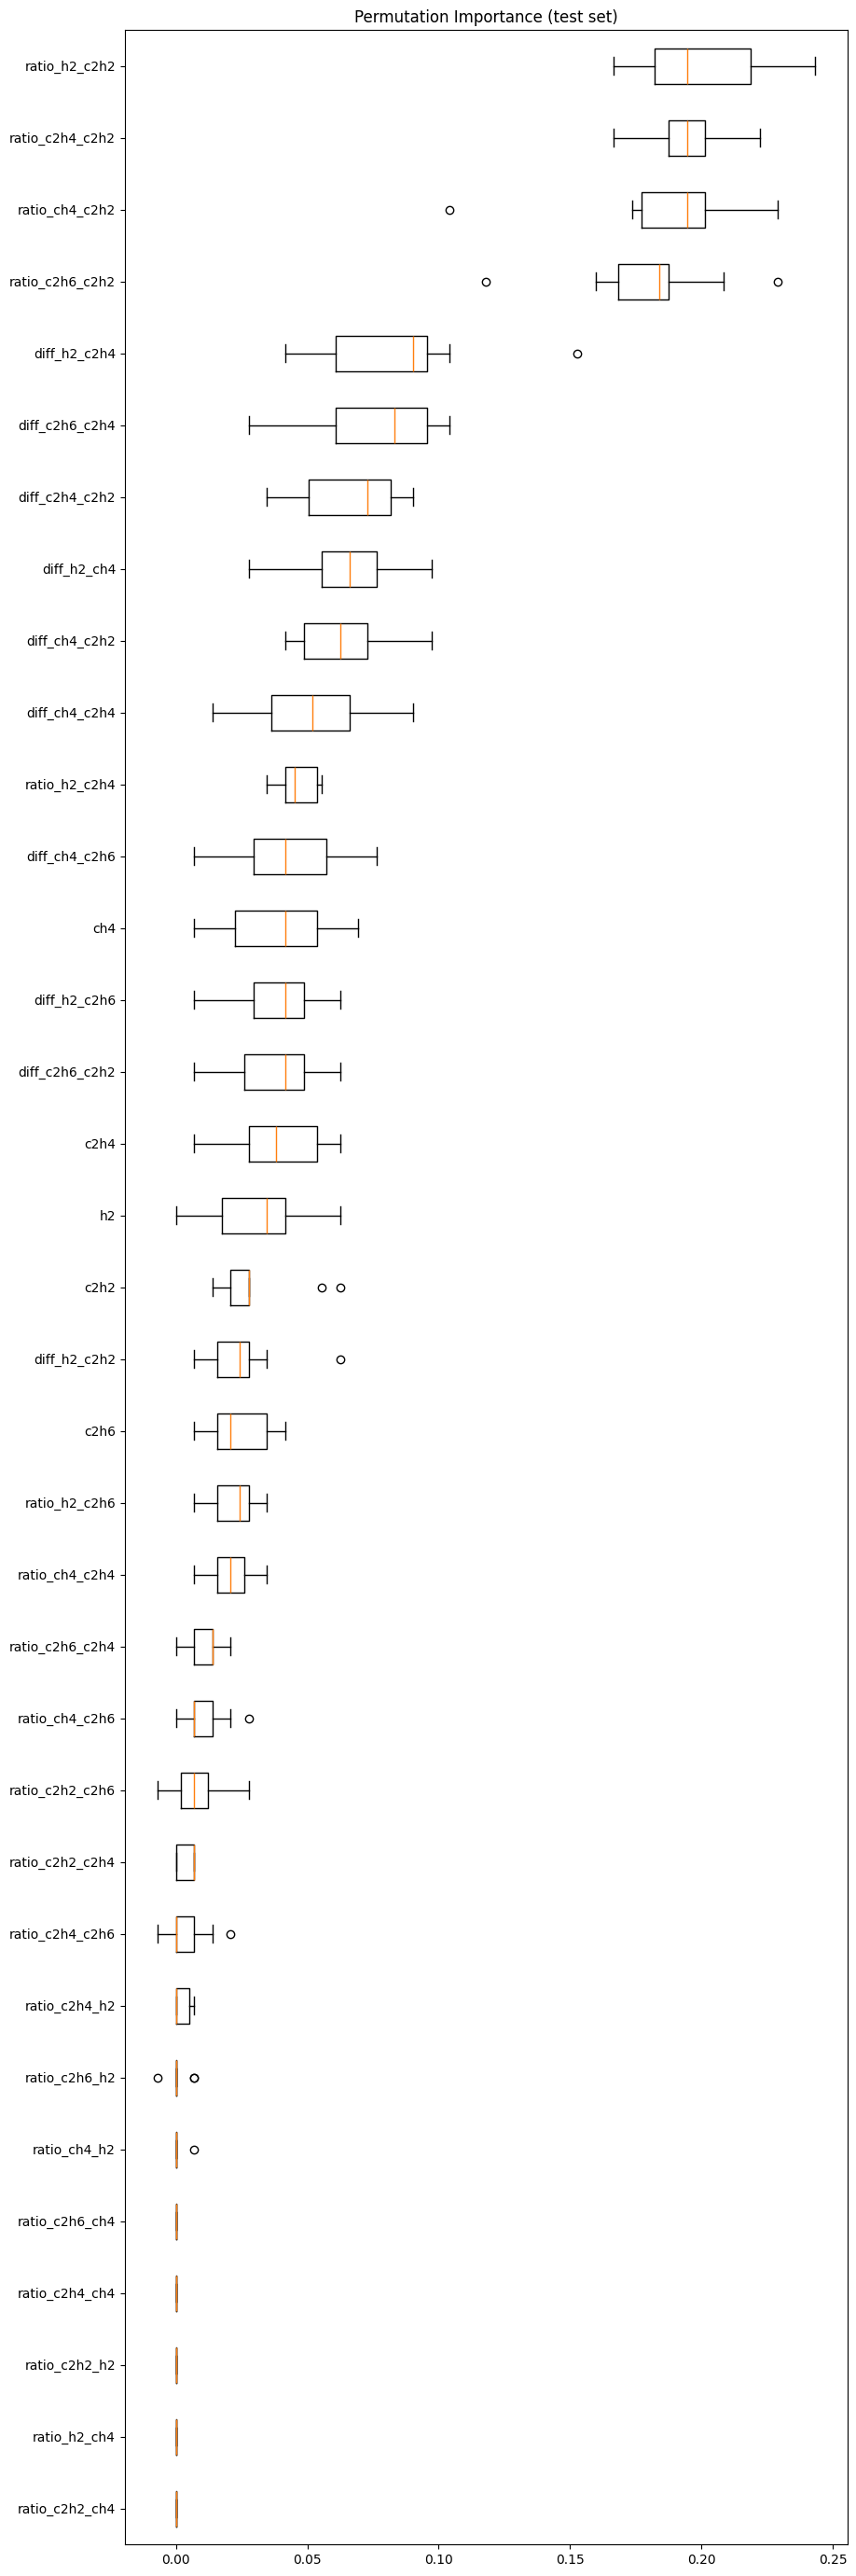

ratio_c2h2_ch4: 0.0000
ratio_h2_ch4: 0.0000
ratio_c2h2_h2: 0.0000
ratio_c2h4_ch4: 0.0000
ratio_c2h6_ch4: 0.0000
ratio_ch4_h2: 0.0007
ratio_c2h6_h2: 0.0007
ratio_c2h4_h2: 0.0021
ratio_c2h4_c2h6: 0.0042
ratio_c2h2_c2h4: 0.0042
ratio_c2h2_c2h6: 0.0076
ratio_ch4_c2h6: 0.0104
ratio_c2h6_c2h4: 0.0118
ratio_ch4_c2h4: 0.0208
ratio_h2_c2h6: 0.0222
c2h6: 0.0236
diff_h2_c2h2: 0.0250
c2h2: 0.0299
h2: 0.0306
c2h4: 0.0389
diff_c2h6_c2h2: 0.0389
diff_h2_c2h6: 0.0389
ch4: 0.0396
diff_ch4_c2h6: 0.0417
ratio_h2_c2h4: 0.0458
diff_ch4_c2h4: 0.0507
diff_ch4_c2h2: 0.0625
diff_h2_ch4: 0.0653
diff_c2h4_c2h2: 0.0674
diff_c2h6_c2h4: 0.0757
diff_h2_c2h4: 0.0840
ratio_c2h6_c2h2: 0.1799
ratio_ch4_c2h2: 0.1882
ratio_c2h4_c2h2: 0.1938
ratio_h2_c2h2: 0.2000


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 假设 X_train, y_train, X_test, y_test 已经定义

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_new_train, y_new_train)

result_new = permutation_importance(classifier, X_new_test, y_new_test, n_repeats=10, random_state=42)

sorted_idx_new = result_new.importances_mean.argsort()

plt.figure(figsize=(10, 35))
plt.boxplot(result_new.importances[sorted_idx_new].T, vert=False, labels=X_new_test.columns[sorted_idx_new])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx_new:
    print(f"{X_new_train.columns[i]}: {result_new.importances_mean[i]:.4f}")

# XGBClassifier

In [20]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=700,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=8,
 scale_pos_weight=2,
 seed=27)


## 未添加新特征

In [18]:
y_train = y_train - 1
y_test = y_test - 1

In [21]:
xgb1.fit(X_train,y_train)

preds = xgb1.predict(X_test) # 输出类别
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,y_test) # 计算准确率
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\11094\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [22:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 77.08%


### 特征重要性（Feature Importance）

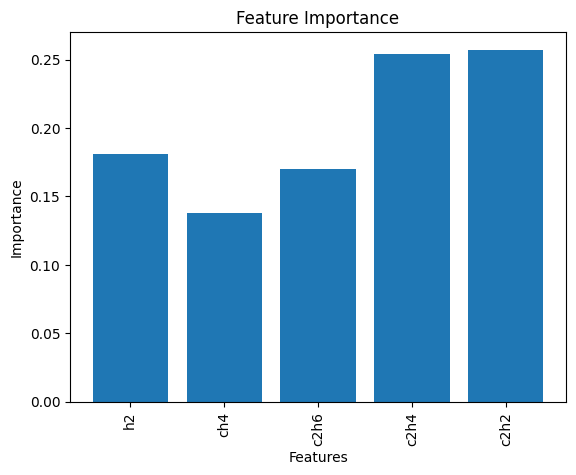

h2: 0.1812
ch4: 0.1375
c2h6: 0.1703
c2h4: 0.2538
c2h2: 0.2572


In [22]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 假设 xgb1, X_train, y_train, X_test, y_test 已经定义

# 获取特征重要性（使用 "gain"）
importance = xgb1.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation='vertical') # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

### 置换重要性（Permutation Importance）

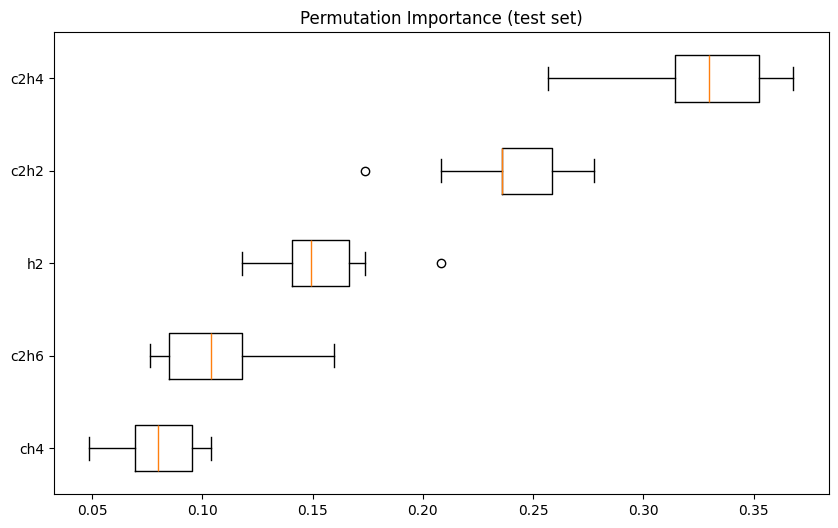

ch4: 0.0806
c2h6: 0.1083
h2: 0.1549
c2h2: 0.2375
c2h4: 0.3257


In [23]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb1, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.4f}")

### SHAP 值（SHapley Additive exPlanations）

In [ ]:
! conda install cloudpickle

In [29]:
import shap

explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

ModuleNotFoundError: No module named 'cloudpickle'

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, preds)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,preds)
print("Accuracy:",result2)

Confusion Matrix:
[[20  3  5  0  0  0]
 [ 2 41  0  0  0  0]
 [ 7  2  9  1  0  0]
 [ 0  1  0 17  1  2]
 [ 1  4  0  3 14  0]
 [ 0  1  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        28
           1       0.79      0.95      0.86        43
           2       0.64      0.47      0.55        19
           3       0.81      0.81      0.81        21
           4       0.93      0.64      0.76        22
           5       0.83      0.91      0.87        11

    accuracy                           0.77       144
   macro avg       0.78      0.75      0.76       144
weighted avg       0.77      0.77      0.76       144

Accuracy: 0.7708333333333334


## 添加新特征

In [26]:
y_new_train = y_new_train - 1
y_new_test = y_new_test - 1

In [ ]:
xgb1.fit(X_new_train,y_new_train)

preds_new = xgb1.predict(X_new_test) # 输出类别

from sklearn.metrics import accuracy_score
accuracy_new = accuracy_score(preds_new,y_new_test) # 计算准确率
print("Accuracy: %.2f%%" % (accuracy_new * 100.0))

C:\Users\11094\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [16:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None, nthread=8,
              num_parallel_tree=None, ...)

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 假设 xgb1, X_train, y_train, X_test, y_test 已经定义

# 获取特征重要性（使用 "gain"）
importance = xgb1.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_new_train.columns, rotation='vertical') # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_new_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_new = confusion_matrix(y_new_test, preds_new)
print("Confusion Matrix:")
print(result_new)
result1_new = classification_report(y_new_test, preds_new)
print("Classification Report:",)
print (result1_new)
result2_new = accuracy_score(y_new_test,preds_new)
print("Accuracy:",result2_new)

Confusion Matrix:
[[22  1  4  0  1  0]
 [ 1 42  0  0  0  0]
 [ 3  1 13  1  0  1]
 [ 0  1  0 19  1  0]
 [ 1  3  0  3 15  0]
 [ 0  0  0  0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.88      0.98      0.92        43
           2       0.76      0.68      0.72        19
           3       0.83      0.90      0.86        21
           4       0.88      0.68      0.77        22
           5       0.92      1.00      0.96        11

    accuracy                           0.85       144
   macro avg       0.85      0.84      0.84       144
weighted avg       0.85      0.85      0.84       144

Accuracy: 0.8472222222222222


# 标准化数据KNN
通常情况下，训练数据和测试数据的标准化应该使用相同的均值和标准差。因此，标准化测试数据时应使用 scaler.transform(X_test) 而不是 scaler.fit_transform(X_test)。这样可以确保训练数据和测试数据使用相同的标准化参数。
## 未添加新特征

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ts = scaler.fit_transform(X_train)
X_tes = scaler.transform(X_test)
classifier.fit(X_ts,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_tes = classifier.predict(X_tes)

In [32]:
accuracy = accuracy_score(y_tes,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.56%


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new_ts = scaler.fit_transform(X_new_train)
X_new_tes = scaler.transform(X_new_test)
classifier.fit(X_new_ts,y_new_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
y_new_tes = classifier.predict(X_new_tes)

In [35]:
accuracy_new = accuracy_score(y_new_tes,y_new_test)
print("Accuracy: %.2f%%" % (accuracy_new * 100.0))

Accuracy: 78.47%


In [36]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV #GridSearchCV代表了自动调参，通过网格搜索参数来获得最好的效果。
# 具体的实现方式为尝试所有的参数组合，通过交叉验证来确定最佳效果参数。

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [37]:
y_t = clf.predict(X_test)
accuracy = accuracy_score(y_t,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.61%


## 添加新特征

In [38]:
clf.fit(X_new_train,y_new_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [39]:
y_new_t = clf.predict(X_new_test)
accuracy_new = accuracy_score(y_new_t,y_new_test)
print("Accuracy: %.2f%%" % (accuracy_new * 100.0))

Accuracy: 73.61%


# 随机森林方法

## 未添加新特征

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=13, random_state=42)

clf.fit(X_train, y_train)

y_t = clf.predict(X_test)

In [41]:
accuracy = accuracy_score(y_t,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.25%


In [43]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)
    y_t = clf.predict(X_test)
    accuracy = accuracy_score(y_t,y_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy * 100.0))
    
# 通过循环，我们可以看到当 max_depth=13 时，准确率最高
# 该循环是为了找到最佳的 max_depth 参数值，即模型的最佳深度
# 模型深度指的是树的最大深度，即树的最大层数  

Depth: 1, Accuracy: 39.58%
Depth: 2, Accuracy: 58.33%
Depth: 3, Accuracy: 63.19%
Depth: 4, Accuracy: 73.61%
Depth: 5, Accuracy: 73.61%
Depth: 6, Accuracy: 75.69%
Depth: 7, Accuracy: 77.08%
Depth: 8, Accuracy: 80.56%
Depth: 9, Accuracy: 81.94%
Depth: 10, Accuracy: 81.94%
Depth: 11, Accuracy: 81.25%
Depth: 12, Accuracy: 81.25%
Depth: 13, Accuracy: 81.25%
Depth: 14, Accuracy: 80.56%
Depth: 15, Accuracy: 80.56%
Depth: 16, Accuracy: 81.25%
Depth: 17, Accuracy: 81.94%
Depth: 18, Accuracy: 81.94%
Depth: 19, Accuracy: 81.25%


## 添加新特征

In [44]:
clf.fit(X_new_train, y_new_train)

y_new_t = clf.predict(X_new_test)

In [45]:
accuracy_new = accuracy_score(y_new_t,y_new_test)
print("Accuracy: %.2f%%" % (accuracy_new * 100.0))

Accuracy: 84.72%


In [46]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_new_train, y_new_train)
    y_new_t = clf.predict(X_new_test)
    accuracy_new = accuracy_score(y_new_t,y_new_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy_new * 100.0))

Depth: 1, Accuracy: 45.14%
Depth: 2, Accuracy: 57.64%
Depth: 3, Accuracy: 73.61%
Depth: 4, Accuracy: 79.86%
Depth: 5, Accuracy: 81.94%
Depth: 6, Accuracy: 83.33%
Depth: 7, Accuracy: 84.72%
Depth: 8, Accuracy: 84.72%
Depth: 9, Accuracy: 84.72%
Depth: 10, Accuracy: 84.72%
Depth: 11, Accuracy: 84.72%
Depth: 12, Accuracy: 84.03%
Depth: 13, Accuracy: 86.11%
Depth: 14, Accuracy: 85.42%
Depth: 15, Accuracy: 85.42%
Depth: 16, Accuracy: 84.72%
Depth: 17, Accuracy: 85.42%
Depth: 18, Accuracy: 84.72%
Depth: 19, Accuracy: 84.72%
